#7 Days Of Code - Alura | Ciência de Dados

#Primeiro passo - Limpeza dos Dados

In [1]:
#Importando biblioteca pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyof
import plotly.graph_objs as pygo

despesa_2022 = pd.read_csv('C:/Users/patri/OneDrive/Documentos/Códigos/Python/7-days-of-code-CD/Data/despesa_ceaps_2022.csv', encoding='ISO-8859-1',delimiter=';', skiprows= 1)

Concatenando os arquivos para um df único e duplicando para não modificar o df original

In [2]:
despesa_ttd = despesa_2022
despesa_ttd = despesa_ttd.drop(1)

Apagando colunas que não serão utilizadas

In [3]:
despesa_ttd.columns

Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DOCUMENTO', 'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO',
       'COD_DOCUMENTO'],
      dtype='object')

In [4]:
despesa_ttd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 0 to 16802
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                16802 non-null  int64 
 1   MES                16802 non-null  int64 
 2   SENADOR            16802 non-null  object
 3   TIPO_DESPESA       16802 non-null  object
 4   CNPJ_CPF           16802 non-null  object
 5   FORNECEDOR         16802 non-null  object
 6   DOCUMENTO          15868 non-null  object
 7   DATA               16802 non-null  object
 8   DETALHAMENTO       9061 non-null   object
 9   VALOR_REEMBOLSADO  16802 non-null  object
 10  COD_DOCUMENTO      16802 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.5+ MB


Ao solicitar as informações do dataset, somente a coluna ‘DETALHAMENTO’ possui valores nulos. Dependendo do ‘TIPO_DESPESA’, esta falta de informação pode dificultar a análise do gasto. Porém, os nulos podem ser preenchidos como ‘Não especificado’, ou algo similar, para não deixar lacunas no dataset.

In [5]:
despesa_ttd['DETALHAMENTO'].fillna('Não informado', inplace=True)

Também há dados nulos na variável documento, que também serão substituídos por ‘Não informado’:

In [6]:
despesa_ttd['DOCUMENTO'].fillna('Não informado', inplace=True)

In [7]:
despesa_ttd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 0 to 16802
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                16802 non-null  int64 
 1   MES                16802 non-null  int64 
 2   SENADOR            16802 non-null  object
 3   TIPO_DESPESA       16802 non-null  object
 4   CNPJ_CPF           16802 non-null  object
 5   FORNECEDOR         16802 non-null  object
 6   DOCUMENTO          16802 non-null  object
 7   DATA               16802 non-null  object
 8   DETALHAMENTO       16802 non-null  object
 9   VALOR_REEMBOLSADO  16802 non-null  object
 10  COD_DOCUMENTO      16802 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.5+ MB


Mudando a formatação da data

In [8]:
pd.to_datetime(despesa_ttd['DATA'].str.title(), format='%d/%m/%Y')

0       2022-01-03
2       2022-01-14
3       2022-01-18
4       2022-01-17
5       2022-01-24
           ...    
16798   2022-12-06
16799   2022-12-09
16800   2022-12-20
16801   2022-12-21
16802   2022-12-30
Name: DATA, Length: 16802, dtype: datetime64[ns]

In [9]:
despesa_ttd['DATA'] = pd.to_datetime(despesa_ttd['DATA'].str.title(), format='%d/%m/%Y')
despesa_ttd

ANO  MES           SENADOR   
0      2022    1      ACIR GURGACZ  \
2      2022    1      ACIR GURGACZ   
3      2022    1      ACIR GURGACZ   
4      2022    1      ACIR GURGACZ   
5      2022    1      ACIR GURGACZ   
...     ...  ...               ...   
16798  2022   12  ZEQUINHA MARINHO   
16799  2022   12  ZEQUINHA MARINHO   
16800  2022   12  ZEQUINHA MARINHO   
16801  2022   12  ZEQUINHA MARINHO   
16802  2022   12  ZEQUINHA MARINHO   

                                            TIPO_DESPESA            CNPJ_CPF   
0      Aluguel de imóveis para escritório político, c...      004.948.028-63  \
2                    Divulgação da atividade parlamentar  13.659.201/0001-47   
3                    Divulgação da atividade parlamentar  23.652.846/0001-01   
4                    Divulgação da atividade parlamentar  08.941.827/0001-01   
5      Passagens aéreas, aquáticas e terrestres nacio...  17.872.428/0001-27   
...                                                  ...                 ...   
16798  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16799  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16800  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16801  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16802  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   

                                              FORNECEDOR          DOCUMENTO   
0                          GILBERTO PISELO DO NASCIMENTO             001/22  \
2                        LINHA PURPURA FOTO E VIDEO LTDA                107   
3                      ROBERTO GUTIERREZ DA ROCHA M.E.I.                187   
4      RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...  000000000001772/A   
5                    AMERICA VIAGENS E TURISMO LTDA - ME             ZTRPJB   
...                                                  ...                ...   
16798                                      Exceller Tour             WIXHAI   
16799                                      Exceller Tour             WITOLM   
16800                                      Exceller Tour             THPKVQ   
16801                                      Exceller Tour             QNN9HX   
16802                                      Exceller Tour             WMQWBX   

            DATA                                       DETALHAMENTO   
0     2022-01-03  Despesa com pagamento de aluguel de imóvel par...  \
2     2022-01-14  Despesa com produção de texto e edição de víde...   
3     2022-01-18                Divulgação da atividade parlamentar   
4     2022-01-17                Divulgação da atividade parlamentar   
5     2022-01-24  Companhia Aérea: LATAM, Localizador: ZTRPJB. P...   
...          ...                                                ...   
16798 2022-12-06  Companhia Aérea: LATAM, Localizador: WIXHAI. P...   
16799 2022-12-09  Companhia Aérea: GOL, Localizador: WITOLM. Pas...   
16800 2022-12-20  Companhia Aérea: TAM, Localizador: THPKVQ. Pas...   
16801 2022-12-21  Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...   
16802 2022-12-30  Companhia Aérea: TAM, Localizador: WMQWBX. Pas...   

      VALOR_REEMBOLSADO  COD_DOCUMENTO  
0                  6000        2173614  
2                  6000        2173616  
3                  1000        2173618  
4                  2000        2173617  
5               1000,36        2174218  
...                 ...            ...  
16798           2893,04        2191398  
16799           1180,19        2192272  
16800            2671,9        2192274  
16801           1334,31        2192244  
16802           2250,72        2193622  

[16802 rows x 11 columns]

Alterando separador de casa decimal de ',' para '.' e transformando em float.

In [10]:
despesa_ttd['VALOR_REEMBOLSADO'].str.replace(',','.').astype(float)


0        6000.00
2        6000.00
3        1000.00
4        2000.00
5        1000.36
          ...   
16798    2893.04
16799    1180.19
16800    2671.90
16801    1334.31
16802    2250.72
Name: VALOR_REEMBOLSADO, Length: 16802, dtype: float64

In [11]:
despesa_ttd['VALOR_REEMBOLSADO'] = despesa_ttd['VALOR_REEMBOLSADO'].str.replace(',','.').astype(float)
despesa_ttd

ANO  MES           SENADOR   
0      2022    1      ACIR GURGACZ  \
2      2022    1      ACIR GURGACZ   
3      2022    1      ACIR GURGACZ   
4      2022    1      ACIR GURGACZ   
5      2022    1      ACIR GURGACZ   
...     ...  ...               ...   
16798  2022   12  ZEQUINHA MARINHO   
16799  2022   12  ZEQUINHA MARINHO   
16800  2022   12  ZEQUINHA MARINHO   
16801  2022   12  ZEQUINHA MARINHO   
16802  2022   12  ZEQUINHA MARINHO   

                                            TIPO_DESPESA            CNPJ_CPF   
0      Aluguel de imóveis para escritório político, c...      004.948.028-63  \
2                    Divulgação da atividade parlamentar  13.659.201/0001-47   
3                    Divulgação da atividade parlamentar  23.652.846/0001-01   
4                    Divulgação da atividade parlamentar  08.941.827/0001-01   
5      Passagens aéreas, aquáticas e terrestres nacio...  17.872.428/0001-27   
...                                                  ...                 ...   
16798  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16799  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16800  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16801  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16802  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   

                                              FORNECEDOR          DOCUMENTO   
0                          GILBERTO PISELO DO NASCIMENTO             001/22  \
2                        LINHA PURPURA FOTO E VIDEO LTDA                107   
3                      ROBERTO GUTIERREZ DA ROCHA M.E.I.                187   
4      RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...  000000000001772/A   
5                    AMERICA VIAGENS E TURISMO LTDA - ME             ZTRPJB   
...                                                  ...                ...   
16798                                      Exceller Tour             WIXHAI   
16799                                      Exceller Tour             WITOLM   
16800                                      Exceller Tour             THPKVQ   
16801                                      Exceller Tour             QNN9HX   
16802                                      Exceller Tour             WMQWBX   

            DATA                                       DETALHAMENTO   
0     2022-01-03  Despesa com pagamento de aluguel de imóvel par...  \
2     2022-01-14  Despesa com produção de texto e edição de víde...   
3     2022-01-18                Divulgação da atividade parlamentar   
4     2022-01-17                Divulgação da atividade parlamentar   
5     2022-01-24  Companhia Aérea: LATAM, Localizador: ZTRPJB. P...   
...          ...                                                ...   
16798 2022-12-06  Companhia Aérea: LATAM, Localizador: WIXHAI. P...   
16799 2022-12-09  Companhia Aérea: GOL, Localizador: WITOLM. Pas...   
16800 2022-12-20  Companhia Aérea: TAM, Localizador: THPKVQ. Pas...   
16801 2022-12-21  Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...   
16802 2022-12-30  Companhia Aérea: TAM, Localizador: WMQWBX. Pas...   

       VALOR_REEMBOLSADO  COD_DOCUMENTO  
0                6000.00        2173614  
2                6000.00        2173616  
3                1000.00        2173618  
4                2000.00        2173617  
5                1000.36        2174218  
...                  ...            ...  
16798            2893.04        2191398  
16799            1180.19        2192272  
16800            2671.90        2192274  
16801            1334.31        2192244  
16802            2250.72        2193622  

[16802 rows x 11 columns]

Verificando se há informações duplicadas

In [12]:
duplicados = despesa_ttd.duplicated()
duplicados.sum()

0

In [13]:
despesa_ttd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 0 to 16802
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                16802 non-null  int64         
 1   MES                16802 non-null  int64         
 2   SENADOR            16802 non-null  object        
 3   TIPO_DESPESA       16802 non-null  object        
 4   CNPJ_CPF           16802 non-null  object        
 5   FORNECEDOR         16802 non-null  object        
 6   DOCUMENTO          16802 non-null  object        
 7   DATA               16802 non-null  datetime64[ns]
 8   DETALHAMENTO       16802 non-null  object        
 9   VALOR_REEMBOLSADO  16802 non-null  float64       
 10  COD_DOCUMENTO      16802 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.5+ MB


Exportando arquivo

In [14]:
despesa_ttd.to_csv('despesa_ttd.csv', sep = ',', index = False)

#Continuação Dia 2 - Storytelling

Passos: Elaborar narrativas a partir dos dados em análise

Analisando exemplos de alunos que já fizeram a atividade,  foram visualizados reembolsos na base de dados de um ano com datas referente ao ano anterior

Segundo o site da câmara dos deputados: "O deputado tem até 90 dias para apresentar a documentação comprobatória do gasto".

Então vamos verificar o número de registros dos três últimos meses de 2021.

In [15]:
sum(despesa_ttd['DATA'] <= '2021-09-30')

39

In [16]:
previous_2021 = (despesa_ttd['DATA'] <= '2021-09-30')
despesa_ttd[previous_2021]

ANO  MES             SENADOR   
1290   2022    2        CARLOS VIANA  \
1304   2022    2        CARLOS VIANA   
2506   2022    1        DÁRIO BERGER   
2547   2022    3        DÁRIO BERGER   
2603   2022    5        DÁRIO BERGER   
2626   2022    6        DÁRIO BERGER   
2641   2022    7        DÁRIO BERGER   
2653   2022    8        DÁRIO BERGER   
2667   2022    9        DÁRIO BERGER   
2678   2022   10        DÁRIO BERGER   
2692   2022   11        DÁRIO BERGER   
2715   2022   12        DÁRIO BERGER   
3415   2022    1       ELMANO FÉRRER   
3747   2022    2     ESPERIDIÃO AMIN   
4090   2022   12     ESPERIDIÃO AMIN   
4134   2022    2   FABIANO CONTARATO   
4135   2022    2   FABIANO CONTARATO   
7984   2022    1  JARBAS VASCONCELOS   
7989   2022    1  JARBAS VASCONCELOS   
8005   2022    2  JARBAS VASCONCELOS   
8026   2022    3  JARBAS VASCONCELOS   
8047   2022    4  JARBAS VASCONCELOS   
8076   2022    5  JARBAS VASCONCELOS   
8723   2022    2      JORGINHO MELLO   
12834  2022    1         PAULO ROCHA   
12849  2022    2         PAULO ROCHA   
12851  2022    2         PAULO ROCHA   
12853  2022    2         PAULO ROCHA   
12869  2022    3         PAULO ROCHA   
12879  2022    3         PAULO ROCHA   
12932  2022    7         PAULO ROCHA   
12939  2022    8         PAULO ROCHA   
13860  2022    5     RODRIGO PACHECO   
14040  2022    2    ROGÉRIO CARVALHO   
16100  2022    4      WEVERTON ROCHA   
16464  2022    1    ZEQUINHA MARINHO   
16465  2022    1    ZEQUINHA MARINHO   
16483  2022    1    ZEQUINHA MARINHO   
16521  2022    2    ZEQUINHA MARINHO   

                                            TIPO_DESPESA            CNPJ_CPF   
1290                 Divulgação da atividade parlamentar  04.904.600/0001-35  \
1304   Locomoção, hospedagem, alimentação, combustíve...  27.391.243/0001-54   
2506   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2547   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2603   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2626   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2641   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2653   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2667   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2678   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2692   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
2715   Locomoção, hospedagem, alimentação, combustíve...  05.481.897/0001-36   
3415   Aluguel de imóveis para escritório político, c...  06.277.571/0001-54   
3747   Aluguel de imóveis para escritório político, c...      682.795.669-53   
4090   Passagens aéreas, aquáticas e terrestres nacio...  00.556.066/0001-62   
4134   Aquisição de material de consumo para uso no e...  28.410.074/0001-15   
4135   Aquisição de material de consumo para uso no e...  28.129.260/0006-95   
7984   Aquisição de material de consumo para uso no e...  61.533.949/0001-41   
7989   Locomoção, hospedagem, alimentação, combustíve...  21.280.350/0001-29   
8005   Aquisição de material de consumo para uso no e...  61.533.949/0001-41   
8026   Aquisição de material de consumo para uso no e...  61.533.949/0001-41   
8047   Aquisição de material de consumo para uso no e...  61.533.949/0001-41   
8076   Aquisição de material de consumo para uso no e...  61.533.949/0001-41   
8723   Locomoção, hospedagem, alimentação, combustíve...  79.794.921/0003-95   
12834  Aquisição de material de consumo para uso no e...  04.929.683/0001-17   
12849  Aluguel de imóveis para escritório político, c...  02.558.157/0001-62   
12851  Aquisição de material de consumo para uso no e...  04.929.683/0001-17   
12853  Contratação de consultorias, assessorias, pesq...  34.527.666/0001-14   
12869  Aquisição de material de consumo para uso no e...  04.929.683/0001-17   
12879  

Estes 39 registros de acordo com as regras do reembolso possuem datas irregulares, então retiraremos eles do dataset.

In [17]:
data_irregular = despesa_ttd[previous_2021]

In [18]:
despesa_ttd.drop(labels = data_irregular.index, inplace = True)
despesa_ttd

ANO  MES           SENADOR   
0      2022    1      ACIR GURGACZ  \
2      2022    1      ACIR GURGACZ   
3      2022    1      ACIR GURGACZ   
4      2022    1      ACIR GURGACZ   
5      2022    1      ACIR GURGACZ   
...     ...  ...               ...   
16798  2022   12  ZEQUINHA MARINHO   
16799  2022   12  ZEQUINHA MARINHO   
16800  2022   12  ZEQUINHA MARINHO   
16801  2022   12  ZEQUINHA MARINHO   
16802  2022   12  ZEQUINHA MARINHO   

                                            TIPO_DESPESA            CNPJ_CPF   
0      Aluguel de imóveis para escritório político, c...      004.948.028-63  \
2                    Divulgação da atividade parlamentar  13.659.201/0001-47   
3                    Divulgação da atividade parlamentar  23.652.846/0001-01   
4                    Divulgação da atividade parlamentar  08.941.827/0001-01   
5      Passagens aéreas, aquáticas e terrestres nacio...  17.872.428/0001-27   
...                                                  ...                 ...   
16798  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16799  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16800  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16801  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   
16802  Passagens aéreas, aquáticas e terrestres nacio...  22.052.777/0001-32   

                                              FORNECEDOR          DOCUMENTO   
0                          GILBERTO PISELO DO NASCIMENTO             001/22  \
2                        LINHA PURPURA FOTO E VIDEO LTDA                107   
3                      ROBERTO GUTIERREZ DA ROCHA M.E.I.                187   
4      RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...  000000000001772/A   
5                    AMERICA VIAGENS E TURISMO LTDA - ME             ZTRPJB   
...                                                  ...                ...   
16798                                      Exceller Tour             WIXHAI   
16799                                      Exceller Tour             WITOLM   
16800                                      Exceller Tour             THPKVQ   
16801                                      Exceller Tour             QNN9HX   
16802                                      Exceller Tour             WMQWBX   

            DATA                                       DETALHAMENTO   
0     2022-01-03  Despesa com pagamento de aluguel de imóvel par...  \
2     2022-01-14  Despesa com produção de texto e edição de víde...   
3     2022-01-18                Divulgação da atividade parlamentar   
4     2022-01-17                Divulgação da atividade parlamentar   
5     2022-01-24  Companhia Aérea: LATAM, Localizador: ZTRPJB. P...   
...          ...                                                ...   
16798 2022-12-06  Companhia Aérea: LATAM, Localizador: WIXHAI. P...   
16799 2022-12-09  Companhia Aérea: GOL, Localizador: WITOLM. Pas...   
16800 2022-12-20  Companhia Aérea: TAM, Localizador: THPKVQ. Pas...   
16801 2022-12-21  Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...   
16802 2022-12-30  Companhia Aérea: TAM, Localizador: WMQWBX. Pas...   

       VALOR_REEMBOLSADO  COD_DOCUMENTO  
0                6000.00        2173614  
2                6000.00        2173616  
3                1000.00        2173618  
4                2000.00        2173617  
5                1000.36        2174218  
...                  ...            ...  
16798            2893.04        2191398  
16799            1180.19        2192272  
16800            2671.90        2192274  
16801            1334.31        2192244  
16802            2250.72        2193622  

[16763 rows x 11 columns]

De acordo com o site da [câmara dos deputados](https://www2.camara.leg.br/comunicacao/assessoria-de-imprensa/guia-para-jornalistas/cota-parlamentar), as despesas que podem ser pagas com a Cota Parlamentar são:

1.   passagens aéreas;
2.   telefones dos gabinetes, dos escritórios nos estados e dos imóveis funcionais, e as despesas com o celular funcional do deputado. As contas devem ser de comprovada responsabilidade do parlamentar;
3. serviços postais, exceto selos;
4. manutenção de escritórios de apoio à atividade parlamentar, como locação de imóveis, energia elétrica, água e esgoto, acesso à internet, entre outros;
5. alimentação do deputado;
6. hospedagem, exceto no Distrito Federal;
7. despesas com locomoção por:
  *   locação ou fretamento de aeronaves;
  *   locação ou fretamento de veículos automotores (limite inacumulável de R 12.713,00 mensais), permitida contratação de seguro;
  * locação ou fretamento de embarcações;
  * serviços de táxi, pedágio e estacionamento (limite inacumulável de R 2.700,00 mensais);
  * passagens terrestres, marítimas ou fluviais.
8. combustíveis e lubrificantes (limite inacumulável de R 6.000,00 mensais);
9. serviços de segurança de empresas especializadas (limite inacumulável de R$ 8.700,00 mensais);
10. consultorias e trabalhos técnicos de apoio ao exercício parlamentar;
11. divulgação da atividade parlamentar (exceto nos 120 dias anteriores à data das eleições, se o deputado for candidato - [Ato da Mesa 40/2012](https://www2.camara.leg.br/legin/int/atomes/2012/atodamesa-40-20-abril-2012-612850-norma-cd-mesa.html));
12. participação em cursos, congressos ou eventos, realizados por instituição especializada (limite mensal inacumulável de 25% do valor da menor cota – hoje R 7.697,17);
13. complementação de auxílio-moradia, de acordo com o [Ato da Mesa 104/88](https://www2.camara.leg.br/legin/int/atomes/1988/atodamesa-104-1-dezembro-1988-320535-norma-cd-mesa.html) (limite inacumulável de R 1.747,00 mensais).

Verificando o tipo de despesa:

In [19]:
despesa_ttd.TIPO_DESPESA.value_counts()

TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   6753
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 3377
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           3317
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.     1216
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                     

Utilizando Plotly para análise visual do tipo de despesa.

In [20]:
trace = pygo.Scatter(x = despesa_ttd['TIPO_DESPESA'],
                   y = despesa_ttd['VALOR_REEMBOLSADO'],
                   mode = 'markers')
data = [trace]
pyof.iplot(data)

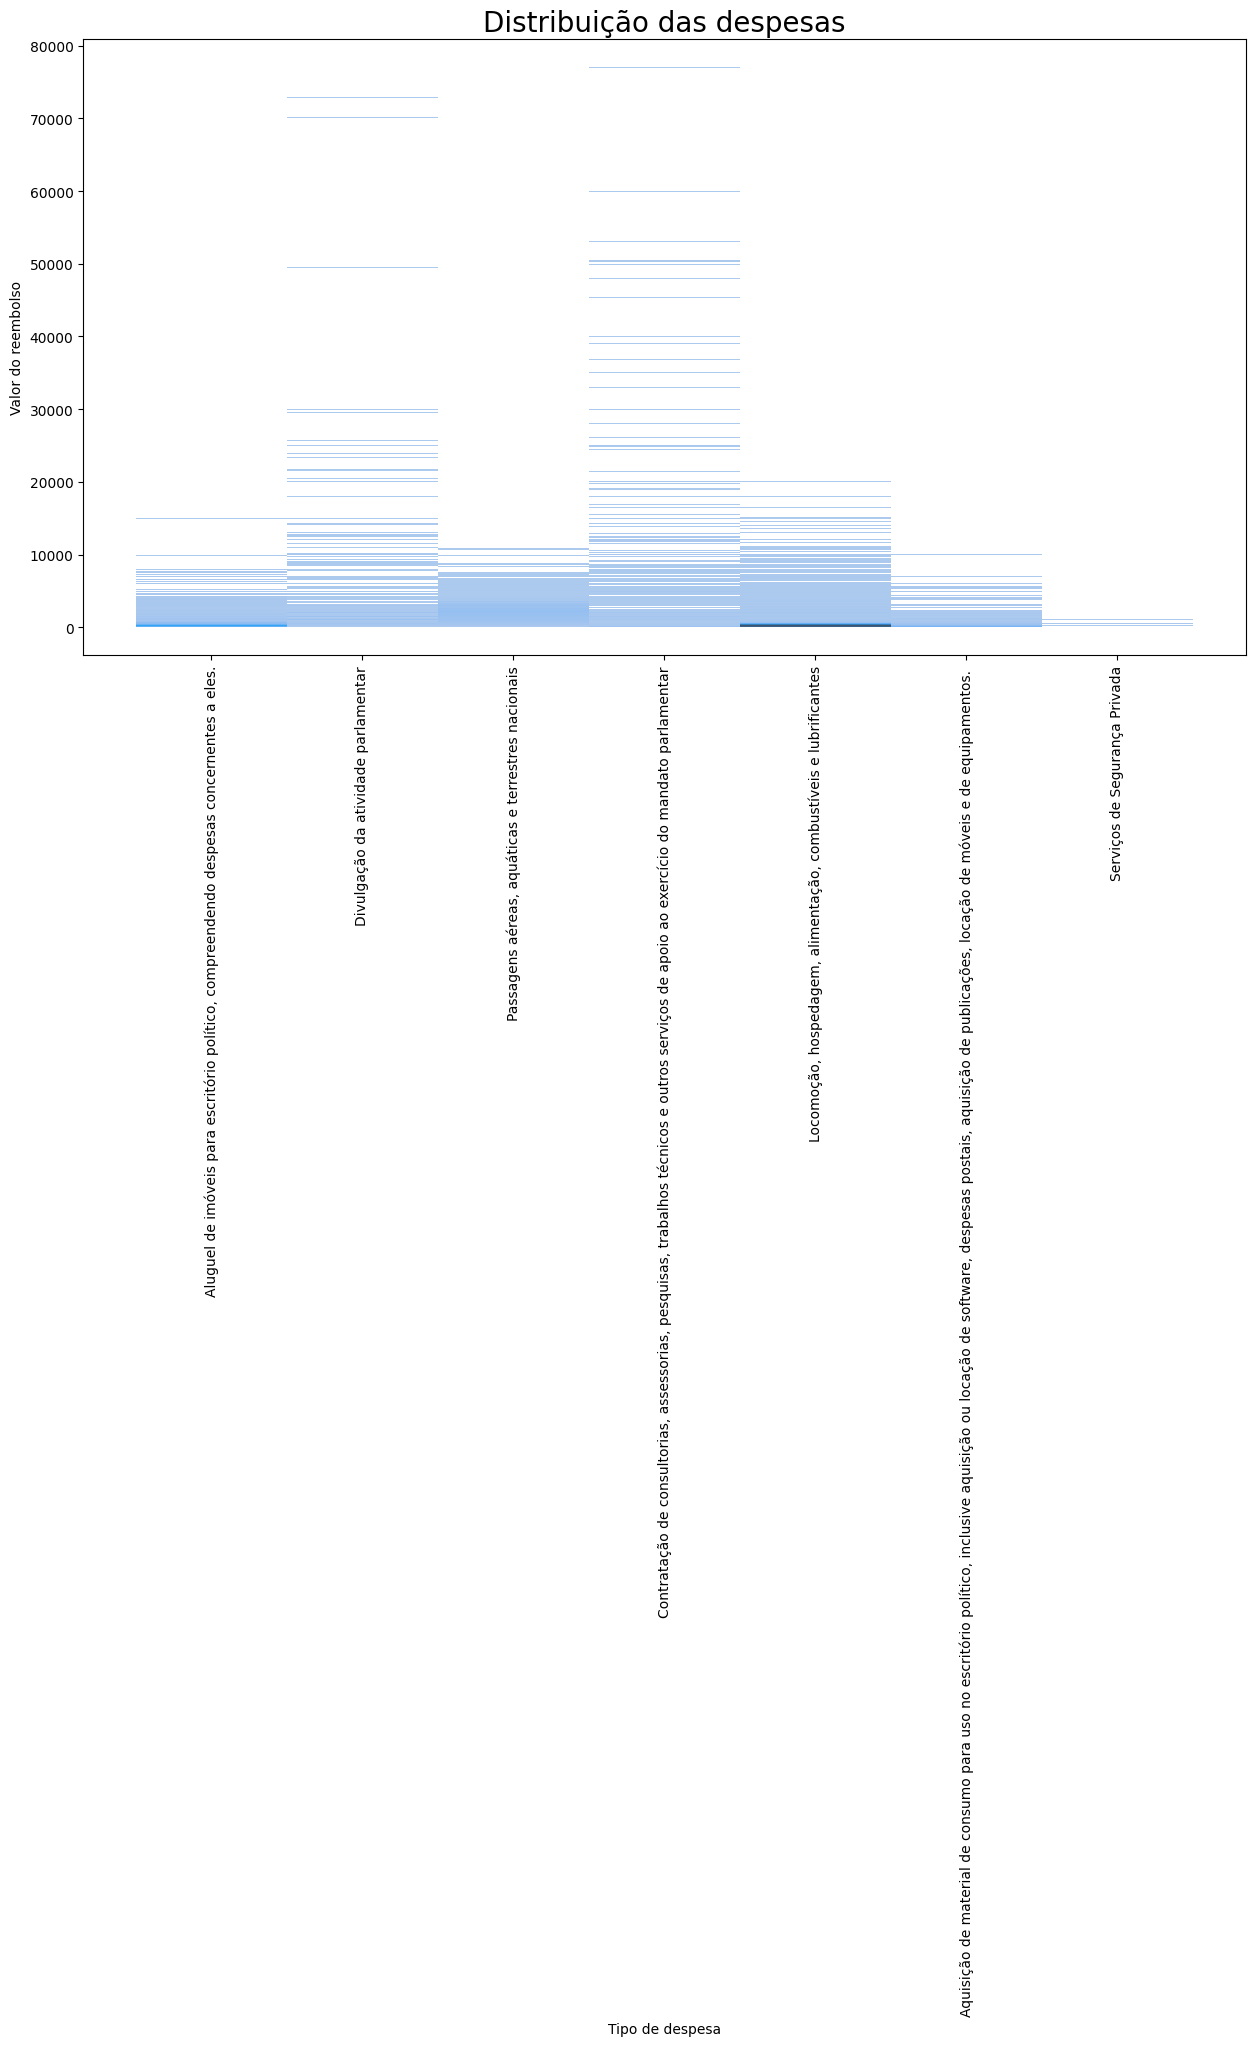

In [21]:
#Análise visual da distribuição das despesas

plt.figure(figsize=(15, 8))
ax = sns.histplot(data = despesa_ttd, x = "TIPO_DESPESA", y='VALOR_REEMBOLSADO');
ax.set_title("Despesas")
plt.xlabel('Tipo de despesa')
plt.ylabel('Valor do reembolso')
plt.title('Distribuição das despesas', fontsize=20)
ax.tick_params(axis='x', rotation=90)
plt.show()

Verificando o número de relatos por Senador.

In [22]:
despesa_ttd.SENADOR.value_counts()

SENADOR
FLÁVIO ARNS                      645
FABIANO CONTARATO                644
HUMBERTO COSTA                   579
JAQUES WAGNER                    530
GIORDANO                         464
                                ... 
LUIZ PASTORE                      11
CHIQUINHO FEITOSA                 11
SAMUEL ARAUJO                      4
MARIA ELIZA DE AGUIAR E SILVA      3
JOSÉ ANÍBAL                        2
Name: count, Length: 97, dtype: int64

Spmando o valor reembolsado por senador

In [23]:
despesa_ttd.groupby(['SENADOR'])['VALOR_REEMBOLSADO'].agg('sum').round(2)

SENADOR
ACIR GURGACZ               419190.40
ALESSANDRO VIEIRA          387264.87
ALEXANDRE SILVEIRA         243079.18
ALVARO DIAS                 69296.32
ANGELO CORONEL             424579.23
                             ...    
VENEZIANO VITAL DO RÊGO    383607.62
WELLINGTON FAGUNDES        413781.99
WEVERTON ROCHA             298963.40
ZENAIDE MAIA               427092.42
ZEQUINHA MARINHO           388892.06
Name: VALOR_REEMBOLSADO, Length: 97, dtype: float64

Realizando análise visual dos valores obtidos.

In [24]:
trace = pygo.Scatter(x = despesa_ttd['SENADOR'],
                   y = despesa_ttd['VALOR_REEMBOLSADO'],
                   mode = 'markers')
data = [trace]
pyof.iplot(data)

Visualizando de outra forma.

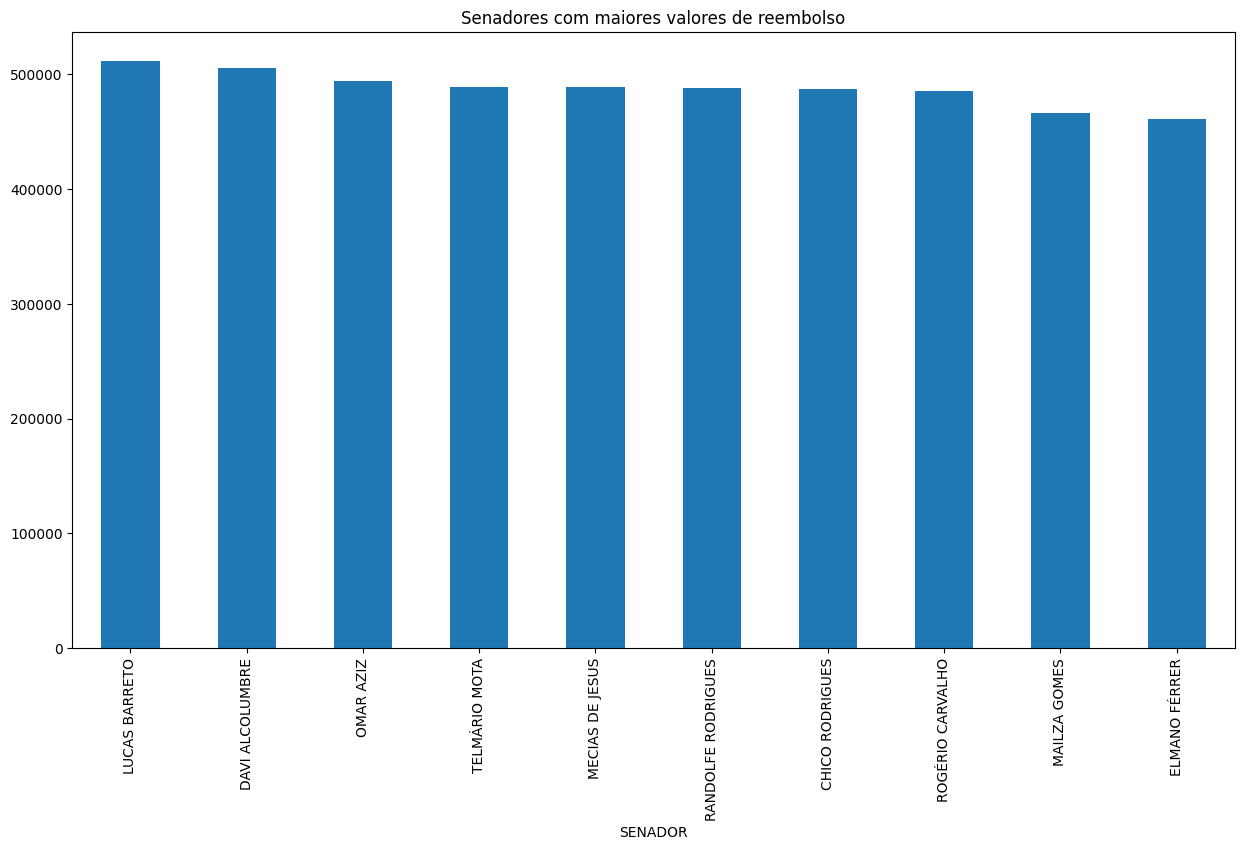

In [25]:
maiores_pedintes_reembolso = despesa_ttd.groupby(['SENADOR'])['VALOR_REEMBOLSADO'].agg('sum').round(2)

maiores_pedintes_reembolso.sort_values(ascending=False).head(10).plot(kind='bar', 
                                                         title='Senadores com maiores valores de reembolso',
                                                         figsize=(15, 8));

Fazendo a mesma análise de relatos, agora por data.

In [26]:
despesa_ttd.DATA.value_counts()

DATA
2022-05-02    140
2022-08-01    129
2022-04-01    110
2022-07-01    109
2022-02-01    108
             ... 
2023-02-17      1
2023-02-09      1
2023-02-27      1
2023-01-01      1
2023-02-01      1
Name: count, Length: 419, dtype: int64

Análise de valor reembolsado por data.

In [27]:
despesa_ttd.groupby(['DATA'])['VALOR_REEMBOLSADO'].agg('sum').round(2)

DATA
2021-10-07       90.00
2021-11-16     7019.12
2021-11-28     2290.00
2021-11-29     5430.85
2021-12-06      225.00
                ...   
2023-03-09     3000.00
2023-03-27    25000.00
2023-11-23      116.00
2023-12-20     3000.00
2023-12-23       60.00
Name: VALOR_REEMBOLSADO, Length: 419, dtype: float64

Realizando a análise visual.

In [28]:
trace = pygo.Scatter(x = despesa_ttd['DATA'],
                   y = despesa_ttd['VALOR_REEMBOLSADO'],
                   mode = 'markers')
data = [trace]
pyof.iplot(data)

Aumentando a amplitude para realizar a mesma análise agora por mês.

In [29]:
despesa_ttd.MES.value_counts()

MES
3     1821
5     1758
4     1588
6     1511
7     1431
2     1426
8     1360
11    1300
10    1226
12    1148
9     1145
1     1049
Name: count, dtype: int64

In [30]:
despesa_ttd.groupby(['MES'])['VALOR_REEMBOLSADO'].agg('sum').round(2)

MES
1     1800562.35
2     2235486.33
3     2726822.99
4     2416270.50
5     2568150.67
6     2218910.15
7     2195034.79
8     2102281.34
9     1632550.87
10    2095080.31
11    2470299.82
12    2779156.80
Name: VALOR_REEMBOLSADO, dtype: float64

Realizando a análise visual.

In [31]:
trace = pygo.Bar(x = despesa_ttd['MES'],
                   y = despesa_ttd['VALOR_REEMBOLSADO'])
data = [trace]
pyof.iplot(data)

Sequência - #Dia3

In [36]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [37]:
from prophet import Prophet

In [45]:
dados_ceaps = pd.read_csv('C:/Users/patri/OneDrive/Documentos/Códigos/Python/7-days-of-code-CD/Data/dataset_ceaps_forecasting.csv', encoding='ANSI')
dados_ceaps

ds          y
0     2018-01-01   13062.46
1     2018-01-02   61972.66
2     2018-01-03   54424.44
3     2018-01-04   21775.57
4     2018-01-05   41703.32
...          ...        ...
1456  2021-12-27   28552.41
1457  2021-12-28  154547.27
1458  2021-12-29   22495.76
1459  2021-12-30  118345.56
1460  2021-12-31   27219.41

[1461 rows x 2 columns]

In [46]:
a = Prophet()
a.fit(dados_ceaps)

21:50:51 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
prox_3meses = a.make_future_dataframe(periods=90)
prox_3meses

ds
0    2018-01-01
1    2018-01-02
2    2018-01-03
3    2018-01-04
4    2018-01-05
...         ...
1546 2022-03-27
1547 2022-03-28
1548 2022-03-29
1549 2022-03-30
1550 2022-03-31

[1551 rows x 1 columns]

In [49]:
previsao = a.predict(prox_3meses)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds           yhat    yhat_lower     yhat_upper
0    2018-01-01   72525.240923  19272.506859  124509.039692
1    2018-01-02   54808.813243   1256.499287  106944.678386
2    2018-01-03   57423.215115   5883.887634  108455.473373
3    2018-01-04   45427.754401  -7124.084218   96420.598756
4    2018-01-05   34760.980668 -15873.155611   92040.916290
...         ...            ...           ...            ...
1546 2022-03-27   26061.756515 -21228.056290   77357.336363
1547 2022-03-28  112122.129466  59657.214900  165258.460458
1548 2022-03-29   96397.104251  43566.054415  145214.946742
1549 2022-03-30  100512.404903  45810.308370  157062.106587
1550 2022-03-31   89514.479458  38070.995173  142050.166004

[1551 rows x 4 columns]

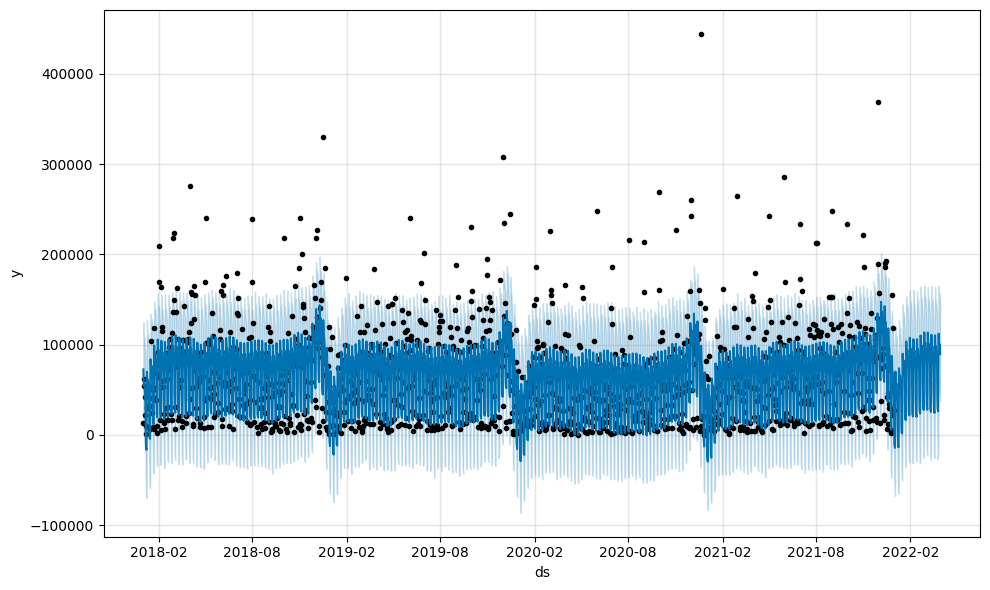

In [50]:
fig1 = a.plot(previsao)

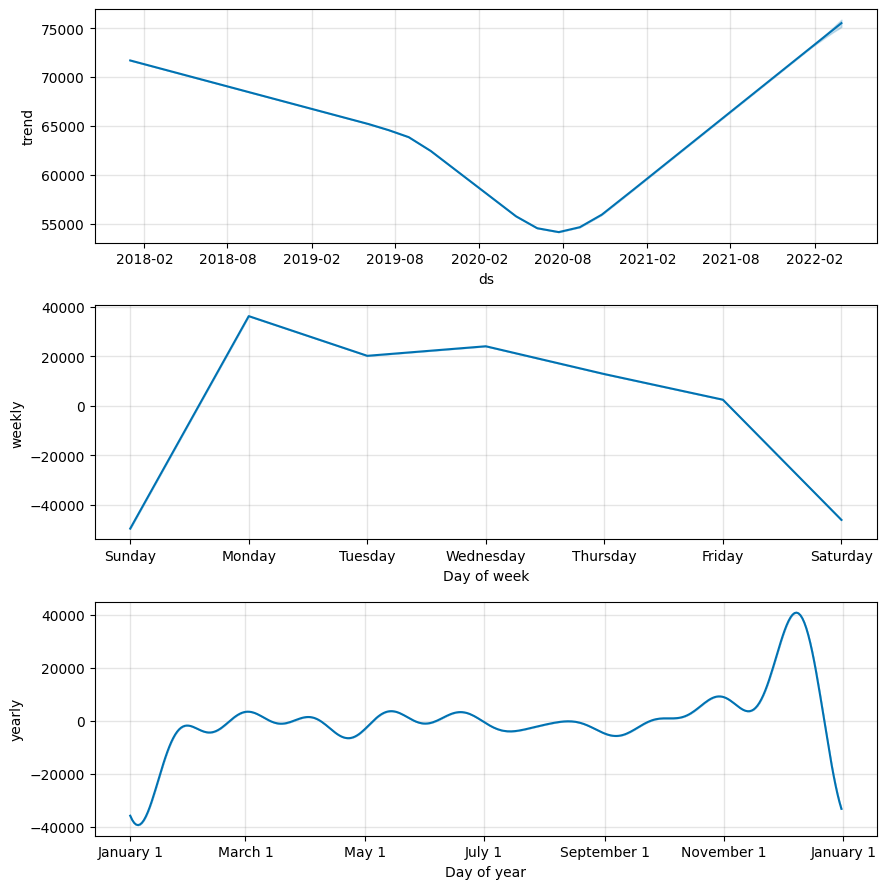

In [51]:
fig2 = a.plot_components(previsao)

In [52]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(a, previsao)